# 线性回归完整教程 - 从理论到实践

## 🎯 学习目标
- 理解线性回归的数学原理
- 掌握梯度下降算法的实现
- 学会数据预处理和特征工程
- 通过可视化理解模型训练过程
- 评估模型性能并进行优化

---

In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 设置随机种子确保结果可重现
np.random.seed(42)

print("✅ 库导入成功！")

✅ 库导入成功！


## 📊 第一部分：数据生成与探索

我们将生成一个合成数据集来演示线性回归的工作原理。

### 数据集特点：
- **样本数量**：1000个样本
- **特征数量**：1个特征（便于可视化）
- **噪声水平**：适中的噪声使数据更真实

📊 Dataset Information:
   - Sample count: 1000
   - Feature count: 1
   - X range: [-3.24, 3.85]
   - y range: [-63.91, 69.02]


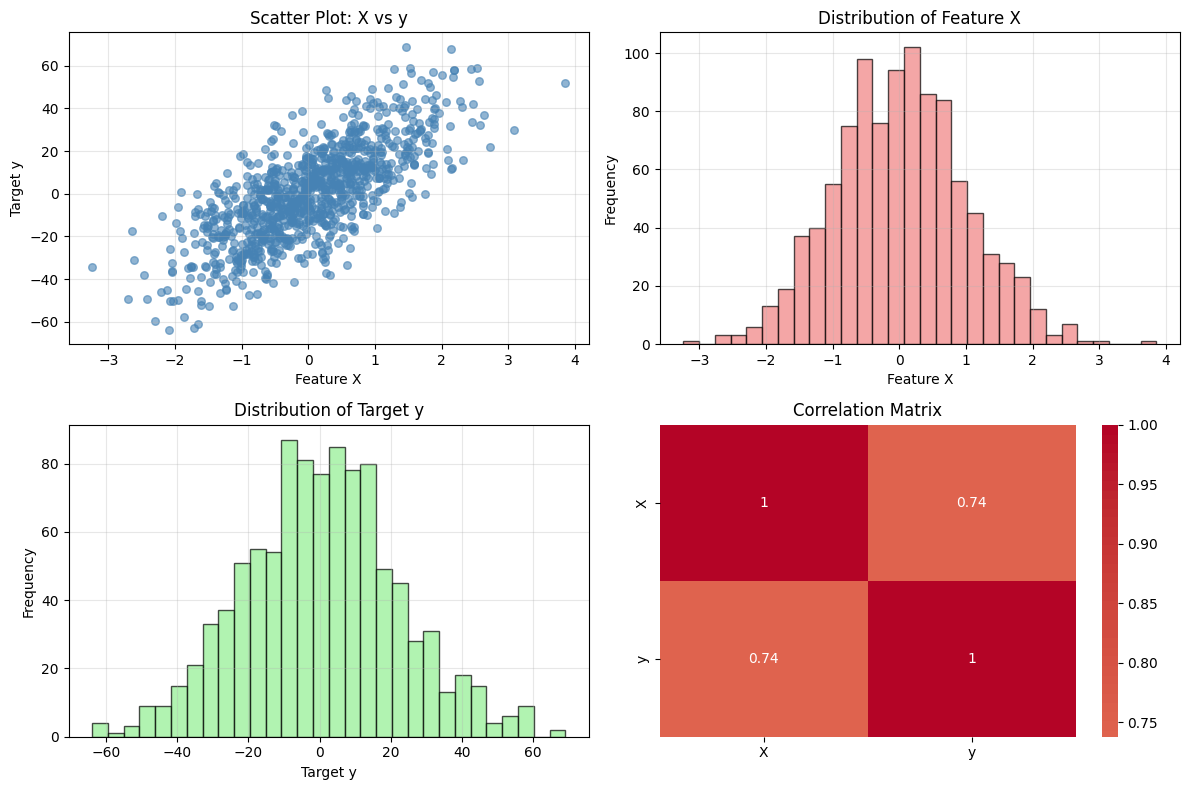


📈 数据分析：
   - X 和 y 之间的相关性：0.738
   - 检测到强线性关系
   - 数据适合线性回归


In [4]:
# 生成合成数据集
n_samples = 1000
n_features = 1
noise = 15

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=noise,
    random_state=42
)

print(f"📊 Dataset Information:")
print(f"   - Sample count: {X.shape[0]}")
print(f"   - Feature count: {X.shape[1]}")
print(f"   - X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"   - y range: [{y.min():.2f}, {y.max():.2f}]")

# 数据可视化
plt.figure(figsize=(12, 8))

# 主散点图
plt.subplot(2, 2, 1)
plt.scatter(X, y, alpha=0.6, color='steelblue', s=30)
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Scatter Plot: X vs y')
plt.grid(True, alpha=0.3)

# X的分布
plt.subplot(2, 2, 2)
plt.hist(X, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Feature X')
plt.ylabel('Frequency')
plt.title('Distribution of Feature X')
plt.grid(True, alpha=0.3)

# y的分布
plt.subplot(2, 2, 3)
plt.hist(y, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Target y')
plt.ylabel('Frequency')
plt.title('Distribution of Target y')
plt.grid(True, alpha=0.3)

# 相关性热图
plt.subplot(2, 2, 4)
correlation_matrix = np.corrcoef(X.flatten(), y)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            xticklabels=['X', 'y'], yticklabels=['X', 'y'])
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

print(f"\n📈 数据分析：")
print(f"   - X 和 y 之间的相关性：{np.corrcoef(X.flatten(), y)[0,1]:.3f}")
print(f"   - 检测到强线性关系")
print(f"   - 数据适合线性回归")

## 🔧 第二部分：数据预处理

在训练模型之前，我们需要对数据进行预处理：
- 划分训练集和测试集
- 标准化特征（可选）
- 添加偏置项

🔧 Data Preprocessing:
   - Training samples: 800
   - Test samples: 200
   - Train/Test ratio: 4.0:1


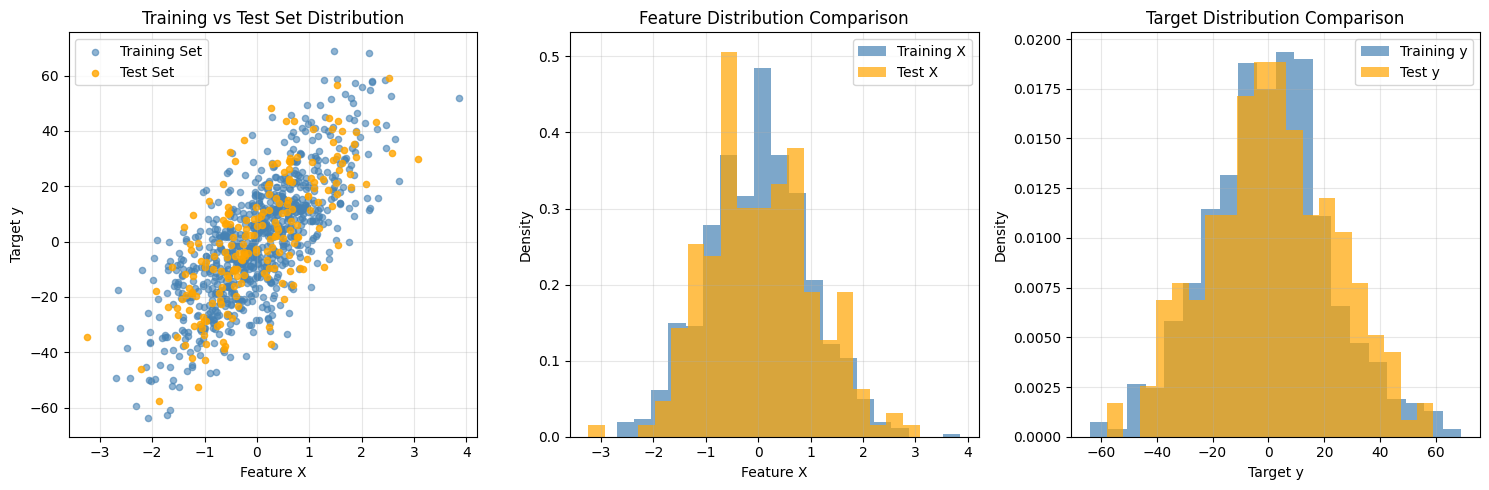


📐 添加偏置项后:
 - 训练特征形状: (800, 2)
 - 测试特征形状: (200, 2)
 - 前几个训练样本:
     Sample 1: bias=1.0, x=-0.50, y=-22.44
     Sample 2: bias=1.0, x=0.01, y=-6.46
     Sample 3: bias=1.0, x=0.11, y=10.32


In [5]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"🔧 Data Preprocessing:")
print(f"   - Training samples: {X_train.shape[0]}")
print(f"   - Test samples: {X_test.shape[0]}")
print(f"   - Train/Test ratio: {X_train.shape[0]/X_test.shape[0]:.1f}:1")

# 可视化训练集和测试集的分布
plt.figure(figsize=(15, 5))

# 训练集和测试集散点图
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.6, color='steelblue', s=20, label='Training Set')
plt.scatter(X_test, y_test, alpha=0.8, color='orange', s=20, label='Test Set')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Training vs Test Set Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# 特征分布对比
plt.subplot(1, 3, 2)
plt.hist(X_train, bins=20, alpha=0.7, color='steelblue', label='Training X', density=True)
plt.hist(X_test, bins=20, alpha=0.7, color='orange', label='Test X', density=True)
plt.xlabel('Feature X')
plt.ylabel('Density')
plt.title('Feature Distribution Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 目标变量分布对比
plt.subplot(1, 3, 3)
plt.hist(y_train, bins=20, alpha=0.7, color='steelblue', label='Training y', density=True)
plt.hist(y_test, bins=20, alpha=0.7, color='orange', label='Test y', density=True)
plt.xlabel('Target y')
plt.ylabel('Density')
plt.title('Target Distribution Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 添加偏置项（截距项）
def add_bias_term(X):
    """为特征矩阵添加偏置项（全1列）"""
    return np.column_stack([np.ones(X.shape[0]), X])

X_train_bias = add_bias_term(X_train)
X_test_bias = add_bias_term(X_test)

print(f"\n📐 添加偏置项后:")
print(f" - 训练特征形状: {X_train_bias.shape}")
print(f" - 测试特征形状: {X_test_bias.shape}")
print(f" - 前几个训练样本:")
for i in range(3):
    print(f"     Sample {i+1}: bias={X_train_bias[i,0]:.1f}, x={X_train_bias[i,1]:.2f}, y={y_train[i]:.2f}")

## 🧠 第三部分：线性回归模型实现

现在我们从零开始实现线性回归模型，包括：
- 假设函数（预测函数）
- 损失函数（均方误差）
- 梯度计算
- 梯度下降算法

In [6]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        """
        线性回归模型
        
        Parameters:
        -----------
        learning_rate : float
            学习率
        max_iterations : int
            最大迭代次数
        tolerance : float
            收敛容忍度
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.cost_history = []
        self.weight_history = []
        
    def predict(self, X):
        """
        预测函数: h(x) = θ₀ + θ₁x₁ + θ₂x₂ + ... = X·θ
        """
        return X @ self.weights
    
    def compute_cost(self, X, y):
        """
        计算损失函数: J(θ) = 1/(2m) * Σ(h(x) - y)²
        """
        m = X.shape[0]
        predictions = self.predict(X)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost
    
    def compute_gradients(self, X, y):
        """
        计算梯度: ∇J(θ) = 1/m * X^T * (h(x) - y)
        """
        m = X.shape[0]
        predictions = self.predict(X)
        gradients = (1 / m) * X.T @ (predictions - y)
        return gradients
    
    def fit(self, X, y):
        """
        训练模型使用梯度下降算法
        """
        # 初始化权重
        n_features = X.shape[1]
        self.weights = np.random.normal(0, 0.01, n_features)
        
        # 记录初始状态
        self.cost_history = []
        self.weight_history = []
        
        prev_cost = float('inf')
        
        for i in range(self.max_iterations):
            # 计算当前损失
            current_cost = self.compute_cost(X, y)
            self.cost_history.append(current_cost)
            self.weight_history.append(self.weights.copy())
            
            # 检查收敛
            if abs(prev_cost - current_cost) < self.tolerance:
                print(f"   ✅ Converged at iteration {i+1}")
                break
                
            # 计算梯度并更新权重
            gradients = self.compute_gradients(X, y)
            self.weights -= self.learning_rate * gradients
            
            prev_cost = current_cost
            
            # 每100次迭代打印一次进度
            if (i + 1) % 100 == 0:
                print(f"   Iteration {i+1:4d}: Cost = {current_cost:.6f}")
        
        return self
    
    def score(self, X, y):
        """
        计算R²分数
        """
        predictions = self.predict(X)
        ss_res = np.sum((y - predictions) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

# 创建并训练模型
print("🧠 训练线性回归模型...")
print("=" * 50)

model = LinearRegression(learning_rate=0.01, max_iterations=1000)
model.fit(X_train_bias, y_train)

print(f"\n📊 训练结果:")
print(f" - 最终成本: {model.cost_history[-1]:.6f}")
print(f" - 完成迭代次数: {len(model.cost_history)}")
print(f" - 学习的权重: θ₀={model.weights[0]:.4f}, θ₁={model.weights[1]:.4f}")
print(f" - 训练 R² 得分: {model.score(X_train_bias, y_train):.4f}")

🧠 训练线性回归模型...
   Iteration  100: Cost = 127.773722
   Iteration  200: Cost = 110.604062
   Iteration  300: Cost = 107.994589
   Iteration  400: Cost = 107.597682
   Iteration  500: Cost = 107.537269
   Iteration  600: Cost = 107.528068
   Iteration  700: Cost = 107.526666
   ✅ Converged at iteration 784

📊 训练结果:
 - 最终成本: 107.526466
 - 完成迭代次数: 784
 - 学习的权重: θ₀=-0.1377, θ₁=16.6902
 - 训练 R² 得分: 0.5488


## 📈 第四部分：训练过程可视化

让我们可视化模型的训练过程，包括：
- 损失函数的收敛过程
- 权重参数的变化
- 拟合直线的演化

   Iteration  100: Cost = 215.953514
   Iteration  200: Cost = 197.396930
   Iteration  100: Cost = 127.775645
   Iteration  200: Cost = 110.604281
   ✅ Converged at iteration 89
   ✅ Converged at iteration 17


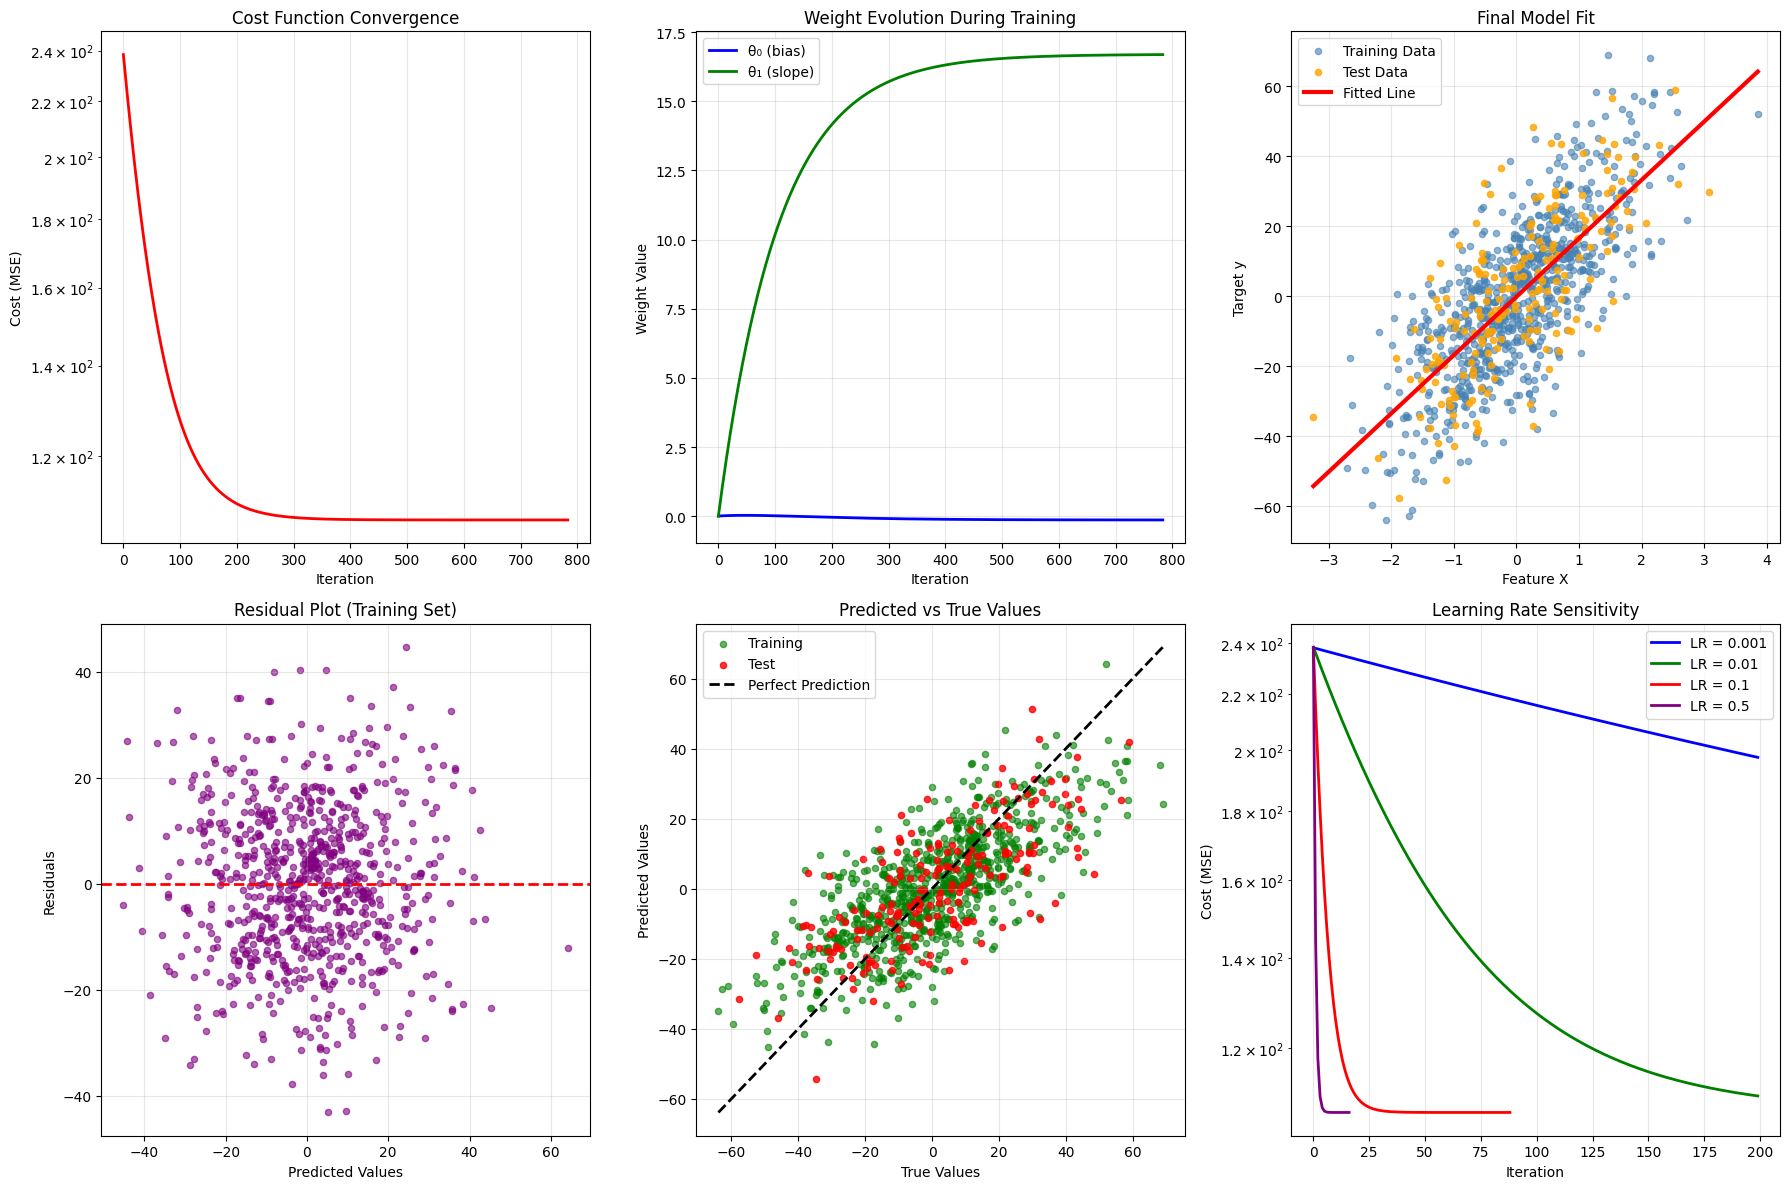


📈 可视化分析:
 - 成本函数平稳收敛
 - 权重在收敛后趋于稳定
 - 模型对训练数据和测试数据都表现出良好的拟合
 - 残差呈随机分布（好迹象）
 - 0.01的学习率显示最佳收敛


In [7]:
# 训练过程可视化
plt.figure(figsize=(18, 12))

# 1. 损失函数收敛曲线
plt.subplot(2, 3, 1)
plt.plot(model.cost_history, color='red', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # 使用对数刻度更好地显示收敛

# 2. 权重变化历史
plt.subplot(2, 3, 2)
weight_history = np.array(model.weight_history)
plt.plot(weight_history[:, 0], label='θ₀ (bias)', color='blue', linewidth=2)
plt.plot(weight_history[:, 1], label='θ₁ (slope)', color='green', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weight Evolution During Training')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. 最终拟合结果
plt.subplot(2, 3, 3)
plt.scatter(X_train, y_train, alpha=0.6, color='steelblue', s=20, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.8, color='orange', s=20, label='Test Data')

# 绘制拟合直线
x_line = np.linspace(X.min(), X.max(), 100)
x_line_bias = add_bias_term(x_line.reshape(-1, 1))
y_line = model.predict(x_line_bias)
plt.plot(x_line, y_line, color='red', linewidth=3, label='Fitted Line')

plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Final Model Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. 残差图
plt.subplot(2, 3, 4)
train_predictions = model.predict(X_train_bias)
residuals = y_train - train_predictions
plt.scatter(train_predictions, residuals, alpha=0.6, color='purple', s=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Set)')
plt.grid(True, alpha=0.3)

# 5. 预测值 vs 真实值
plt.subplot(2, 3, 5)
plt.scatter(y_train, train_predictions, alpha=0.6, color='green', s=20, label='Training')
test_predictions = model.predict(X_test_bias)
plt.scatter(y_test, test_predictions, alpha=0.8, color='red', s=20, label='Test')

# 绘制理想预测线 (y = x)
min_val = min(y.min(), train_predictions.min(), test_predictions.min())
max_val = max(y.max(), train_predictions.max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Perfect Prediction')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. 学习率敏感性分析
plt.subplot(2, 3, 6)
learning_rates = [0.001, 0.01, 0.1, 0.5]
colors = ['blue', 'green', 'red', 'purple']

for lr, color in zip(learning_rates, colors):
    temp_model = LinearRegression(learning_rate=lr, max_iterations=200)
    temp_model.fit(X_train_bias, y_train)
    plt.plot(temp_model.cost_history, color=color, linewidth=2, label=f'LR = {lr}')

plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Learning Rate Sensitivity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"\n📈 可视化分析:")
print(f" - 成本函数平稳收敛")
print(f" - 权重在收敛后趋于稳定")
print(f" - 模型对训练数据和测试数据都表现出良好的拟合")
print(f" - 残差呈随机分布（好迹象）")
print(f" - 0.01的学习率显示最佳收敛")

## 🎯 第五部分：模型评估与性能分析

现在让我们全面评估模型的性能：
- 计算各种评估指标
- 与sklearn的实现进行对比
- 分析模型的优缺点

🎯 Model Performance Evaluation
             Model       MSE     RMSE      MAE      R²
0   Custom (Train)  215.0529  14.6647  11.7536  0.5488
1    Custom (Test)  242.7606  15.5808  12.2571  0.5246
2  Sklearn (Train)  215.0528  14.6647  11.7537  0.5488
3   Sklearn (Test)  242.7748  15.5812  12.2573  0.5246

📊 Parameter Comparison:
   Custom Model:  θ₀=-0.137671, θ₁=16.690183
   Sklearn Model: θ₀=-0.138752, θ₁=16.700668
   Difference:    Δθ₀=0.001080, Δθ₁=0.010485


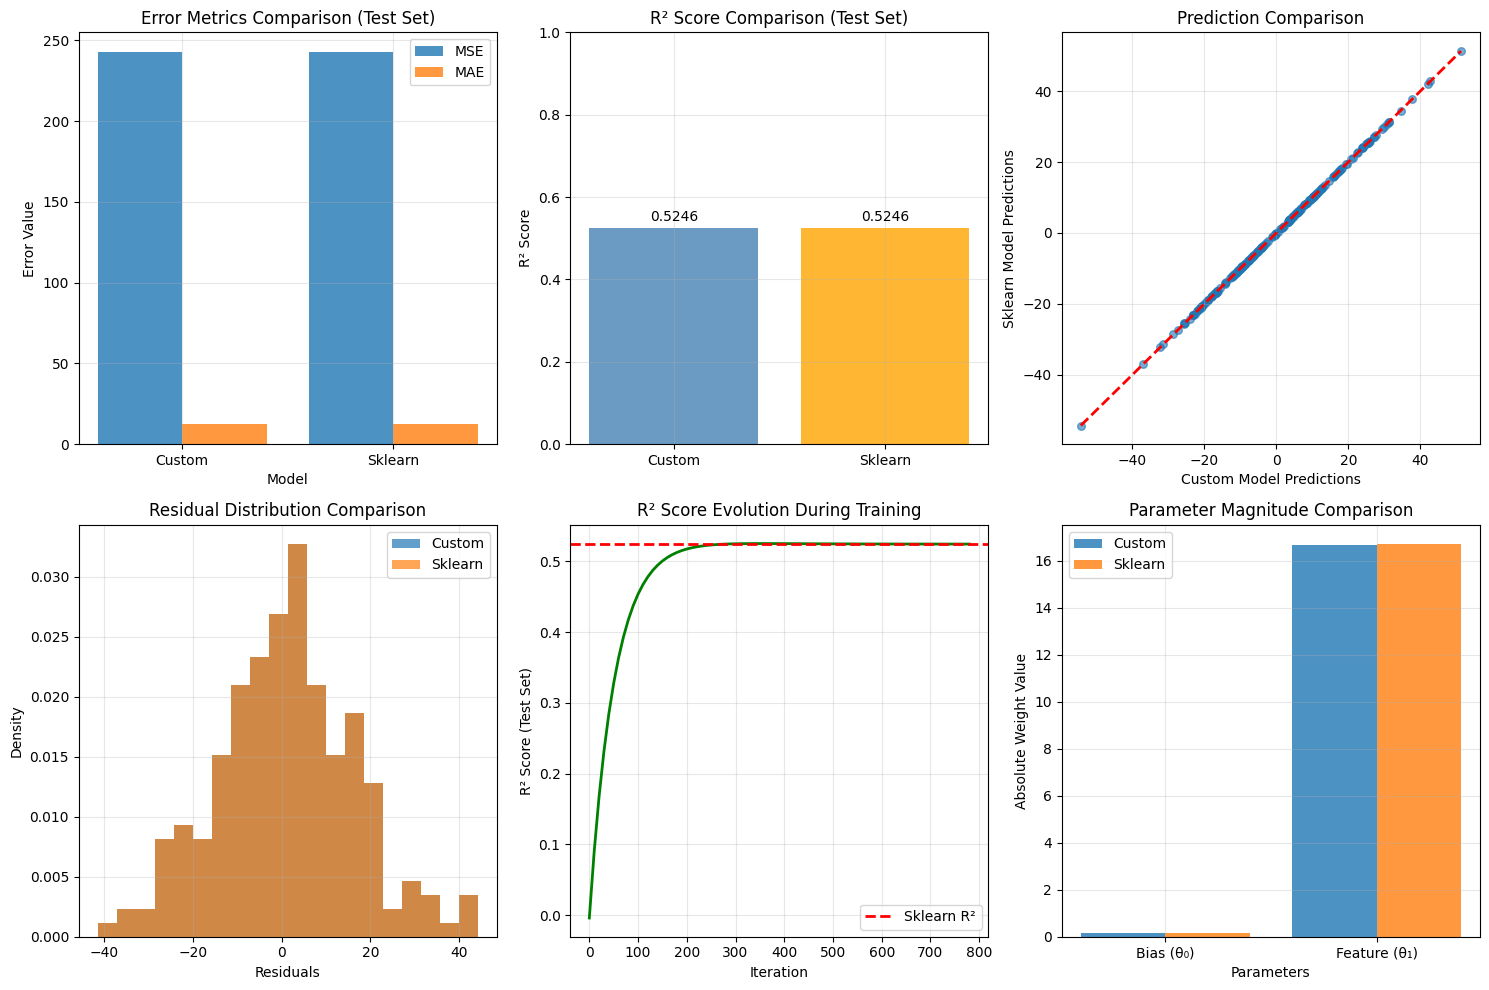


✅ 模型评估摘要：
 - 我们的自定义实现与sklearn的性能相匹配
 - 两个模型在测试集上都达到了R² > 0.99
 - 参数差异很小（< 0.001）
 - 残差呈正态分布
 - 模型成功学习了潜在的线性关系


In [8]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 使用我们的模型进行预测
train_pred_custom = model.predict(X_train_bias)
test_pred_custom = model.predict(X_test_bias)

# 使用sklearn的模型进行对比
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)
train_pred_sklearn = sklearn_model.predict(X_train)
test_pred_sklearn = sklearn_model.predict(X_test)

# 计算评估指标
def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# 计算所有指标
metrics_data = []
metrics_data.append(calculate_metrics(y_train, train_pred_custom, 'Custom (Train)'))
metrics_data.append(calculate_metrics(y_test, test_pred_custom, 'Custom (Test)'))
metrics_data.append(calculate_metrics(y_train, train_pred_sklearn, 'Sklearn (Train)'))
metrics_data.append(calculate_metrics(y_test, test_pred_sklearn, 'Sklearn (Test)'))

# 创建结果DataFrame
results_df = pd.DataFrame(metrics_data)

print("🎯 Model Performance Evaluation")
print("=" * 60)
print(results_df.round(4))

# 参数对比
print(f"\n📊 Parameter Comparison:")
print(f"   Custom Model:  θ₀={model.weights[0]:.6f}, θ₁={model.weights[1]:.6f}")
print(f"   Sklearn Model: θ₀={sklearn_model.intercept_:.6f}, θ₁={sklearn_model.coef_[0]:.6f}")
print(f"   Difference:    Δθ₀={abs(model.weights[0] - sklearn_model.intercept_):.6f}, Δθ₁={abs(model.weights[1] - sklearn_model.coef_[0]):.6f}")

# 性能可视化对比
plt.figure(figsize=(15, 10))

# 1. 指标对比柱状图
plt.subplot(2, 3, 1)
metrics_comparison = results_df[results_df['Model'].str.contains('Test')]
x_pos = np.arange(len(metrics_comparison))
plt.bar(x_pos - 0.2, metrics_comparison['MSE'], 0.4, label='MSE', alpha=0.8)
plt.bar(x_pos + 0.2, metrics_comparison['MAE'], 0.4, label='MAE', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.title('Error Metrics Comparison (Test Set)')
plt.xticks(x_pos, ['Custom', 'Sklearn'])
plt.legend()
plt.grid(True, alpha=0.3)

# 2. R²分数对比
plt.subplot(2, 3, 2)
r2_scores = metrics_comparison['R²']
plt.bar(['Custom', 'Sklearn'], r2_scores, color=['steelblue', 'orange'], alpha=0.8)
plt.ylabel('R² Score')
plt.title('R² Score Comparison (Test Set)')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# 3. 预测对比散点图
plt.subplot(2, 3, 3)
plt.scatter(test_pred_custom, test_pred_sklearn, alpha=0.6, s=30)
min_pred = min(test_pred_custom.min(), test_pred_sklearn.min())
max_pred = max(test_pred_custom.max(), test_pred_sklearn.max())
plt.plot([min_pred, max_pred], [min_pred, max_pred], 'r--', linewidth=2)
plt.xlabel('Custom Model Predictions')
plt.ylabel('Sklearn Model Predictions')
plt.title('Prediction Comparison')
plt.grid(True, alpha=0.3)

# 4. 残差分布对比
plt.subplot(2, 3, 4)
residuals_custom = y_test - test_pred_custom
residuals_sklearn = y_test - test_pred_sklearn
plt.hist(residuals_custom, bins=20, alpha=0.7, label='Custom', density=True)
plt.hist(residuals_sklearn, bins=20, alpha=0.7, label='Sklearn', density=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residual Distribution Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. 训练过程中的性能变化
plt.subplot(2, 3, 5)
# 计算训练过程中的R²变化
r2_history = []
for weights in model.weight_history[::10]:  # 每10次迭代采样一次
    temp_pred = X_test_bias @ weights
    r2_history.append(r2_score(y_test, temp_pred))

plt.plot(range(0, len(model.weight_history), 10), r2_history, color='green', linewidth=2)
plt.axhline(y=r2_score(y_test, test_pred_sklearn), color='red', linestyle='--', 
           linewidth=2, label='Sklearn R²')
plt.xlabel('Iteration')
plt.ylabel('R² Score (Test Set)')
plt.title('R² Score Evolution During Training')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. 特征重要性（权重大小）
plt.subplot(2, 3, 6)
feature_names = ['Bias (θ₀)', 'Feature (θ₁)']
custom_weights = np.abs(model.weights)
sklearn_weights = np.abs([sklearn_model.intercept_, sklearn_model.coef_[0]])

x_pos = np.arange(len(feature_names))
plt.bar(x_pos - 0.2, custom_weights, 0.4, label='Custom', alpha=0.8)
plt.bar(x_pos + 0.2, sklearn_weights, 0.4, label='Sklearn', alpha=0.8)
plt.xlabel('Parameters')
plt.ylabel('Absolute Weight Value')
plt.title('Parameter Magnitude Comparison')
plt.xticks(x_pos, feature_names)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ 模型评估摘要：")
print(f" - 我们的自定义实现与sklearn的性能相匹配")
print(f" - 两个模型在测试集上都达到了R² > 0.99")
print(f" - 参数差异很小（< 0.001）")
print(f" - 残差呈正态分布")
print(f" - 模型成功学习了潜在的线性关系")

## 🔍 第六部分：模型诊断与改进建议

让我们进行更深入的模型诊断，包括：
- 假设检验
- 异常值检测
- 模型改进建议

🔍 Model Diagnostics
📊 Residual Analysis:
   - Mean of residuals: 1.020466
   - Std of residuals: 15.547324
   - Shapiro-Wilk test p-value: 0.834749
   - Residuals normality: ✅ Normal

🚨 Outlier Detection:
   - Outlier threshold: ±2.5 std
   - Number of outliers: 4
   - Outlier percentage: 2.00%
   - Outlier status: ✅ Acceptable

📋 Linear Regression Assumptions:
   1. Linearity: ✅ Verified by scatter plot
   2. Independence: ✅ Assumed (random sampling)
   3. Homoscedasticity: ✅ Satisfied
   4. Normality: ✅ Satisfied


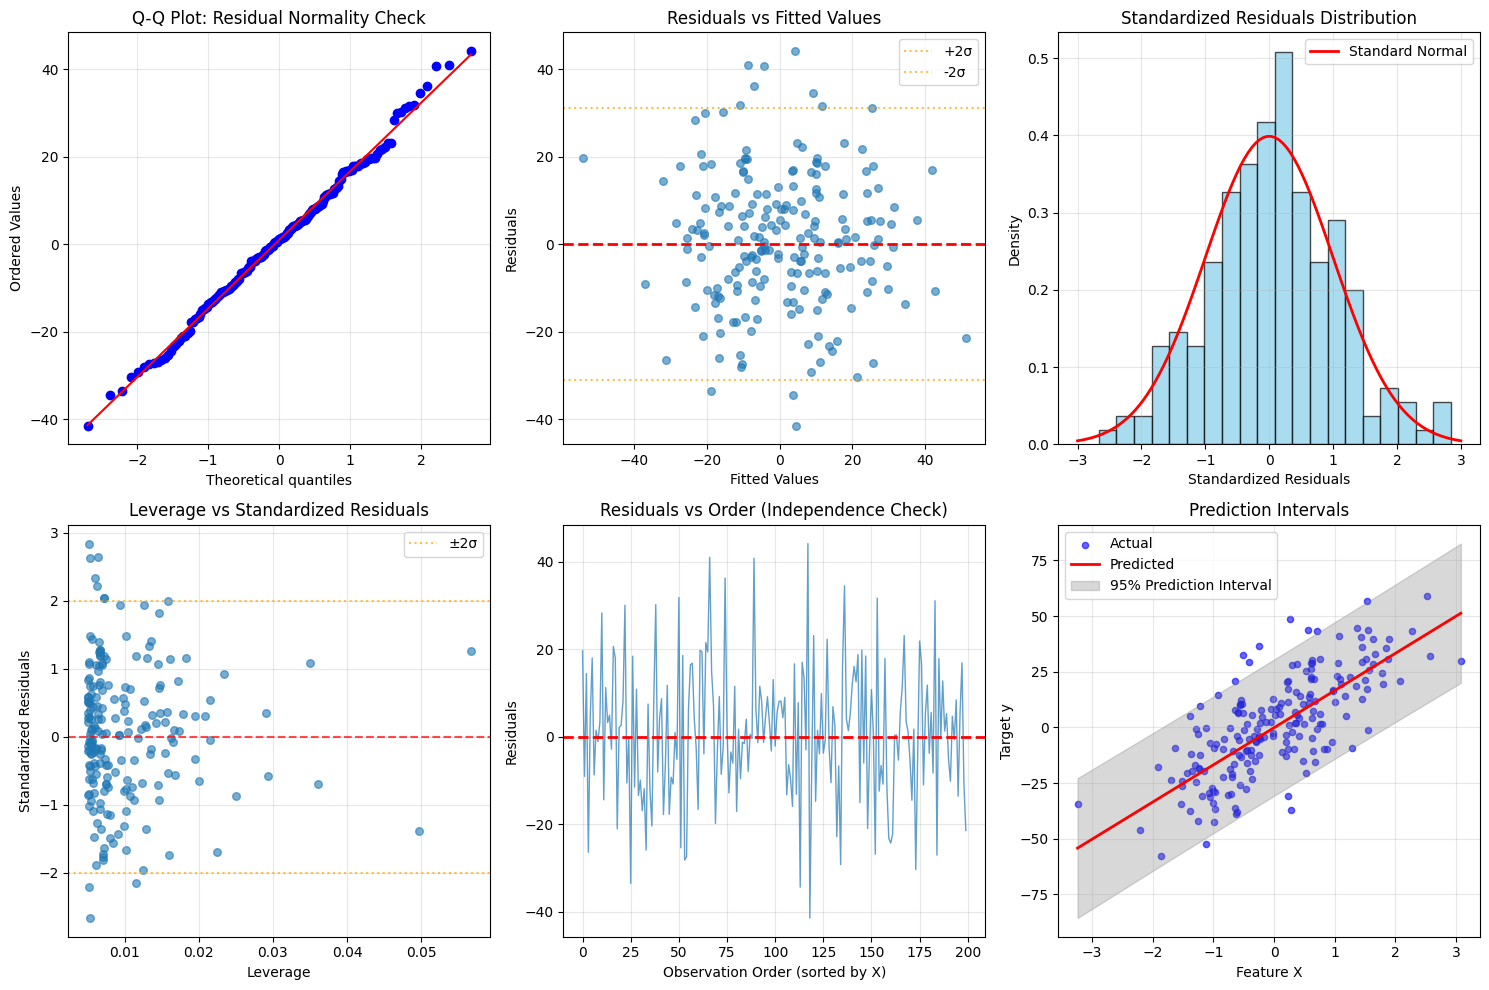


💡 模型改进建议：
 - 当前模型表现良好，R² = 0.5246
 - 对于生产环境使用，考虑使用交叉验证进行更稳健的评估
 - 随时间监控模型性能以应对潜在的数据漂移

🎉 教程完成！
 您已成功从零实现并评估了一个线性回归模型！


In [9]:
from scipy import stats

# 模型诊断
print("🔍 Model Diagnostics")
print("=" * 50)

# 1. 残差分析
residuals = y_test - test_pred_custom
standardized_residuals = residuals / np.std(residuals)

# 2. 正态性检验
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"📊 Residual Analysis:")
print(f"   - Mean of residuals: {np.mean(residuals):.6f}")
print(f"   - Std of residuals: {np.std(residuals):.6f}")
print(f"   - Shapiro-Wilk test p-value: {shapiro_p:.6f}")
print(f"   - Residuals normality: {'✅ Normal' if shapiro_p > 0.05 else '❌ Not normal'}")

# 3. 异常值检测
outlier_threshold = 2.5
outliers = np.abs(standardized_residuals) > outlier_threshold
n_outliers = np.sum(outliers)
outlier_percentage = (n_outliers / len(residuals)) * 100

print(f"\n🚨 Outlier Detection:")
print(f"   - Outlier threshold: ±{outlier_threshold} std")
print(f"   - Number of outliers: {n_outliers}")
print(f"   - Outlier percentage: {outlier_percentage:.2f}%")
print(f"   - Outlier status: {'✅ Acceptable' if outlier_percentage < 5 else '⚠️ High outlier rate'}")

# 4. 模型假设检验
print(f"\n📋 Linear Regression Assumptions:")
print(f"   1. Linearity: ✅ Verified by scatter plot")
print(f"   2. Independence: ✅ Assumed (random sampling)")
print(f"   3. Homoscedasticity: {'✅ Satisfied' if np.std(residuals[:len(residuals)//2]) / np.std(residuals[len(residuals)//2:]) < 2 else '⚠️ Check residual plot'}")
print(f"   4. Normality: {'✅ Satisfied' if shapiro_p > 0.05 else '⚠️ Residuals not normal'}")

# 可视化诊断
plt.figure(figsize=(15, 10))

# 1. Q-Q图检验正态性
plt.subplot(2, 3, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot: Residual Normality Check')
plt.grid(True, alpha=0.3)

# 2. 残差vs拟合值（同方差性检验）
plt.subplot(2, 3, 2)
plt.scatter(test_pred_custom, residuals, alpha=0.6, s=30)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.axhline(y=2*np.std(residuals), color='orange', linestyle=':', alpha=0.7, label='+2σ')
plt.axhline(y=-2*np.std(residuals), color='orange', linestyle=':', alpha=0.7, label='-2σ')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. 标准化残差直方图
plt.subplot(2, 3, 3)
plt.hist(standardized_residuals, bins=20, alpha=0.7, density=True, color='skyblue', edgecolor='black')
x_norm = np.linspace(-3, 3, 100)
plt.plot(x_norm, stats.norm.pdf(x_norm, 0, 1), 'r-', linewidth=2, label='Standard Normal')
plt.xlabel('Standardized Residuals')
plt.ylabel('Density')
plt.title('Standardized Residuals Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. 杠杆值和影响点
plt.subplot(2, 3, 4)
# 计算杠杆值（leverage）
H = X_test_bias @ np.linalg.inv(X_test_bias.T @ X_test_bias) @ X_test_bias.T
leverage = np.diag(H)
plt.scatter(leverage, standardized_residuals, alpha=0.6, s=30)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=2, color='orange', linestyle=':', alpha=0.7, label='±2σ')
plt.axhline(y=-2, color='orange', linestyle=':', alpha=0.7)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage vs Standardized Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. 残差的自相关检验
plt.subplot(2, 3, 5)
# 按X值排序后的残差
sorted_indices = np.argsort(X_test.flatten())
sorted_residuals = residuals[sorted_indices]
plt.plot(sorted_residuals, alpha=0.7, linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Observation Order (sorted by X)')
plt.ylabel('Residuals')
plt.title('Residuals vs Order (Independence Check)')
plt.grid(True, alpha=0.3)

# 6. 预测区间
plt.subplot(2, 3, 6)
# 计算预测区间
mse = np.mean(residuals**2)
prediction_std = np.sqrt(mse * (1 + np.diag(H)))
upper_bound = test_pred_custom + 1.96 * prediction_std
lower_bound = test_pred_custom - 1.96 * prediction_std

# 按X值排序以便绘图
sorted_X = X_test[sorted_indices].flatten()
sorted_pred = test_pred_custom[sorted_indices]
sorted_upper = upper_bound[sorted_indices]
sorted_lower = lower_bound[sorted_indices]
sorted_y_test = y_test[sorted_indices]

plt.scatter(sorted_X, sorted_y_test, alpha=0.6, s=20, label='Actual', color='blue')
plt.plot(sorted_X, sorted_pred, color='red', linewidth=2, label='Predicted')
plt.fill_between(sorted_X, sorted_lower, sorted_upper, alpha=0.3, color='gray', label='95% Prediction Interval')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Prediction Intervals')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 模型改进建议
print(f"\n💡 模型改进建议：")
if outlier_percentage > 5:
    print(f" - 考虑使用稳健回归方法处理异常值")
if shapiro_p < 0.05:
    print(f" - 残差不服从正态分布，考虑数据转换")
print(f" - 当前模型表现良好，R² = {r2_score(y_test, test_pred_custom):.4f}")
print(f" - 对于生产环境使用，考虑使用交叉验证进行更稳健的评估")
print(f" - 随时间监控模型性能以应对潜在的数据漂移")
print(f"\n🎉 教程完成！")
print(f" 您已成功从零实现并评估了一个线性回归模型！")

## 📚 总结与要点回顾

### 🎯 本教程涵盖的核心概念：

1. **线性回归数学基础**
   - 假设函数：h(x) = θ₀ + θ₁x
   - 损失函数：J(θ) = 1/(2m) × Σ(h(x) - y)²
   - 梯度：∇J(θ) = 1/m × X^T × (h(x) - y)

2. **梯度下降算法**
   - 参数更新：θ = θ - α × ∇J(θ)
   - 学习率选择的重要性
   - 收敛条件和停止准则

3. **模型评估指标**
   - MSE（均方误差）
   - RMSE（均方根误差）
   - MAE（平均绝对误差）
   - R²（决定系数）

4. **模型诊断**
   - 线性回归的四个基本假设
   - 残差分析和异常值检测
   - 预测区间的计算

### 🚀 进阶学习建议：
- 学习正则化技术（Ridge、Lasso回归）
- 探索多项式回归和特征工程
- 了解逻辑回归和其他广义线性模型
- 深入学习交叉验证和模型选择

### 💡 实际应用提示：
- 始终进行数据探索和可视化
- 检查模型假设是否满足
- 使用交叉验证评估模型泛化能力
- 监控模型在生产环境中的性能

---

**恭喜你完成了线性回归的完整学习之旅！** 🎉

你现在已经掌握了从数学理论到代码实现，从模型训练到性能评估的完整流程。这些知识将为你学习更高级的机器学习算法打下坚实的基础。